In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 161M/163M [00:01<00:00, 125MB/s]
100% 163M/163M [00:01<00:00, 127MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1209.jpg', 'with_mask_2099.jpg', 'with_mask_1539.jpg', 'with_mask_1105.jpg', 'with_mask_2282.jpg']
['with_mask_3467.jpg', 'with_mask_1132.jpg', 'with_mask_495.jpg', 'with_mask_108.jpg', 'with_mask_1954.jpg']


In [7]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3045.jpg', 'without_mask_2225.jpg', 'without_mask_3274.jpg', 'without_mask_3581.jpg', 'without_mask_2577.jpg']
['without_mask_1551.jpg', 'without_mask_244.jpg', 'without_mask_1804.jpg', 'without_mask_2241.jpg', 'without_mask_2685.jpg']


In [8]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


with mask  -->  1

without mask  -->  0

In [9]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [10]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [12]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

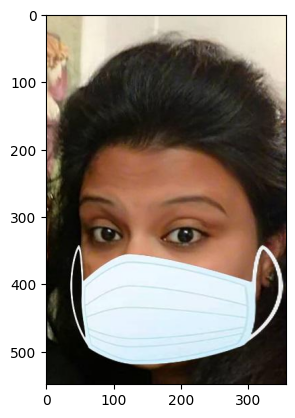

In [13]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1541.jpg')
imgplot = plt.imshow(img)
plt.show()

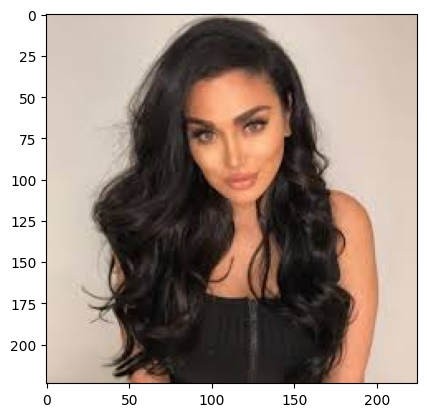

In [14]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2920.jpg')
imgplot = plt.imshow(img)
plt.show()

In [15]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
type(data)

list

In [17]:
len(data)

7553

array([[[ 42,  49,  41],
        [ 44,  51,  43],
        [ 51,  58,  50],
        ...,
        [ 50,  36,  40],
        [ 52,  37,  40],
        [ 53,  37,  40]],

       [[ 42,  49,  41],
        [ 44,  51,  43],
        [ 50,  57,  49],
        ...,
        [ 47,  33,  37],
        [ 49,  34,  37],
        [ 49,  34,  37]],

       [[ 42,  49,  41],
        [ 43,  50,  42],
        [ 47,  54,  47],
        ...,
        [ 40,  28,  33],
        [ 41,  28,  32],
        [ 41,  28,  32]],

       ...,

       [[253, 250, 246],
        [254, 250, 245],
        [255, 249, 244],
        ...,
        [218, 193,  87],
        [218, 193,  87],
        [218, 193,  87]],

       [[249, 245, 242],
        [250, 246, 243],
        [252, 249, 245],
        ...,
        [219, 194,  89],
        [220, 194,  89],
        [220, 194,  89]],

       [[247, 243, 241],
        [248, 245, 242],
        [251, 249, 245],
        ...,
        [220, 194,  89],
        [221, 194,  89],
        [221, 194,  89]]], dtype=uint8)
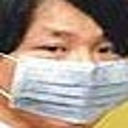

In [18]:
data[0]

In [19]:
type(data[0])

numpy.ndarray

In [20]:
data[0].shape

(128, 128, 3)

In [21]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [22]:
type(X)

numpy.ndarray

In [23]:
type(Y)

numpy.ndarray

In [24]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [25]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [28]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[229, 233, 234],
        [221, 225, 226],
        [212, 216, 217],
        ...,
        [247, 247, 247],
        [246, 246, 246],
        [246, 246, 246]],

       [[228, 232, 233],
        [220, 224, 225],
        [211, 215, 216],
        ...,
        [246, 246, 246],
        [245, 245, 245],
        [245, 245, 245]],

       [[227, 231, 232],
        [219, 223, 224],
        [210, 214, 215],
        ...,
        [245, 245, 245],
        [244, 244, 244],
        [244, 244, 244]]], dtype=uint8)
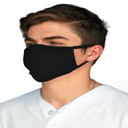

In [29]:
X_train[0]

In [30]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.89803922, 0.91372549, 0.91764706],
        [0.86666667, 0.88235294, 0.88627451],
        [0.83137255, 0

**Building a Convolutional Neural Networks (CNN)**

In [31]:
import tensorflow as tf
from tensorflow import keras

In [32]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [39]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=50)

Epoch 1/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9423 - loss: 0.1424 - val_acc: 0.9339 - val_loss: 0.2110
Epoch 2/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9516 - loss: 0.1261 - val_acc: 0.9256 - val_loss: 0.2155
Epoch 3/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - acc: 0.9572 - loss: 0.1123 - val_acc: 0.9306 - val_loss: 0.2396
Epoch 4/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9631 - loss: 0.0998 - val_acc: 0.9322 - val_loss: 0.2271
Epoch 5/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9578 - loss: 0.1098 - val_acc: 0.9289 - val_loss: 0.2594
Epoch 6/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - acc: 0.9729 - loss: 0.0773 - val_acc: 0.9273 - val_loss: 0.2706
Epoch 7/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9712 - loss: 0.0781 - val_acc: 0.9256 - val_loss: 0.2923
Epoch 8/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9770 - loss: 0.0599 - val_acc: 0.9256 - val_loss: 0.3653
Epoch 9/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/

**Model Evaluation**

In [40]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9320 - loss: 0.3960
Test Accuracy = 0.9291859865188599


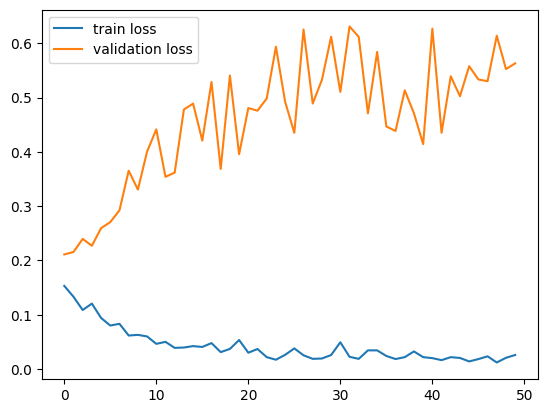

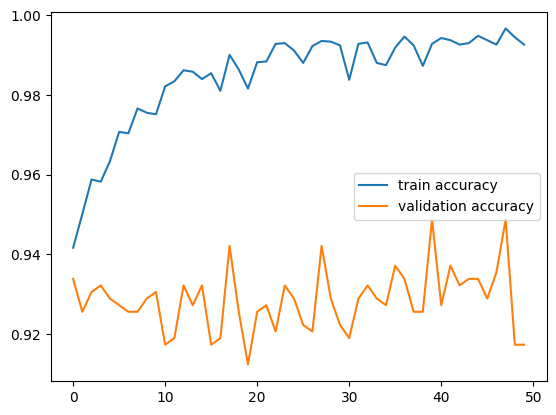

In [41]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/businesswoman-commuting-by-bus-while-wearing-surgical-mask.webp


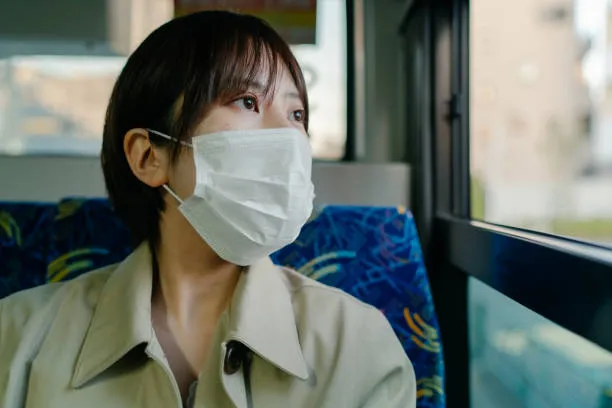

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[1.         0.21115723]]
0
The person in the image is not wearing a mask


In [43]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is not wearing a mask')

else:

  print('The person in the image is wearing a mask')

Path of the image to be predicted: /content/businesswoman-commuting-by-bus-while-wearing-surgical-mask.webp


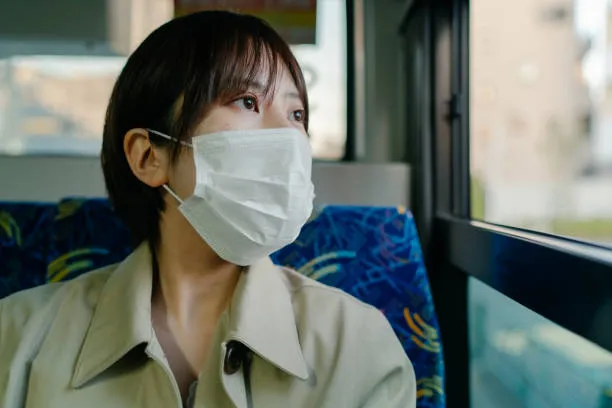

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[1.         0.21115723]]
0
The person in the image is wearing a mask


In [44]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:

  print('The person in the image is not wearing a mask')

else:

  print('The person in the image is wearing a mask')

In [45]:
model.save('mask.keras')